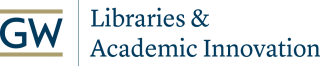

# Python Practice
## Algorithms: Thinking in Code

**Instructors**: Dolsy Smith

**Date**: Wednesday, September 20

**Time**: 2:30 - 4:30 pm

**Location**: Gelman Library, Room 302

## Outline

1. [Dixit Algorismi](#Dixit-Algorismi)
2. [Finding Palindromes](#Problem-1:-Finding-Palindromes)
3. [Run-Length Encoding](#Problem-2:-Run-Length-Encoding)
4. [Aggregating by Groups](#Problem-3:-Aggregating-by-Groups)
5. [Rolling Weather Windows](#Problem-4:-Rolling-Weather-Windows)

## _Dixit Algorismi_

Algorithms are foundational for computing. Although we think of them now as something that _computers_ do, they precede the invention of the digital computer by several millenia. The origin of the term, in fact, lies in the Latinization of the name of a famous  mathematician, Abu Ja’far Muhammad ibn Musa al-Khawarizmi, author of the earliest known textbook on algebra in Arabic. When Europeans translated this textbook into Latin in the 12th Century CE, they rendered his surname, _al-Khawarizmi_, as _Algorismi_ ([Wikipedia](https://en.wikipedia.org/wiki/Algorithm)).

It's useful to think about algorithms as _procedures of thought_ as well as _acts of translation_. 

In this workshop, we'll practice thinking through a few different computational problems and translating our thinking into Python code. 

## Problem 1: Finding Palindromes

#### Write a Python function that detects whether a given string is a palindrome. 
The function should return `True` if it is, `False` otherwise.

### Definitions

A **palindrome** is any sequence of characters that reads the same from left to right as from right to left. Examples of palindromes include the following:
> racecar
> 2002
> aaabbccccbbaaa

For the purpose of this problem, we'll exclude fun examples such as "never odd or even" and "Madam, in Eden, I'm Adam," which while palindromic to readers of English, are not literally palindromes (in the sense defined above), since spaces, capital letters, and/or punctuation render the sequences non-identical when reversed. 

We will also count a sequence consisting of a single character as a palindrome, e.g., `"a"`, `"1"`, etc.

### Hints

- A Python **string** is a sequence of characters.
- Each character has a well-defined position. For instance, let `my_string = "hello"`. Then `my_string[0] == "h"` and `my_string[4] == "o"`.
- We can also use negative indexing to access characters from right to left: `my_string[-1] == "o"`.
- We can also extract substrings by using **slice notation**: `my_string[0:3] == "hell"`.
- Two strings are considered identical by Python if they consist of the same sequence of characters in the same order: `"my_string == "hello"`. 


In [ ]:
def is_palindrome(p):
    # Delete the line below and write your code here.
    # Don't forget to return something! 
    pass

In [8]:
# Palindrome test function
from random import choice, choices, randrange
def test_palindrome(fn):
    charlist = "abcdefghijklmnopqrstuvwxy0123456789"
    for n in [1, 2, 3, 5, 10, 15, 25, 50]:
        if n == 1:
            palindrome = choice(charlist)
            assert fn(palindrome) == True, f"Palindrome function failed on palindrome {palindrome}, of size 1."
        else:
            palindrome = ''.join(choices(charlist, k=n))
            palindrome = palindrome + palindrome[::-1]
            assert fn(palindrome) == True, f"Palindrome function failed on {palindrome}, of size {n*2}."  
            if len(set(palindrome)) > 1:
                non_palindrome = palindrome[:-1]
            else:
                non_palindrom = palindrome + 'z'
            assert fn(non_palindrome) == False, f"Palindrome function failed on {non_palindrome}, not a palindrome."
    return "Success!"

In [ ]:
test_palindrome(is_palindrome)

## Problem 2: Run-Length Encoding

#### Write a function that encodes a given Python string using run-length encoding. 

### Definitions

**Run-length encoding** is an actual algorithm used for data compression. It works in situations where discrete elements repeat for extended periods within a sequence. The algorithm reduces such a sequence to a shorter sequence by representing each "run" of a repeated element to two data points: the element and the number of times it repeats. 

For instance, the sequence `WWWWWWWWWWWWBWWWWWWWWWWWWBBBWWWWWWWWWWWWWWWWWWWWWWWWBWWWWWWWWWWWWWW` would be represented as 
`12W1B12W3B24W1B14W`.

Can you think of kinds of data where run-length encoding might be a good choice for compression?

### Hints & Constraints

- Since our inputs will by Python strings, the elements to enocode will be characters.
- For simplicity's sake, assume that no strings will include numbers (0-9). Any other kind of character is fair game.
- Even if an element does not repeat in the original sequence, it must still be encoded. For instance, the first `B` in the example above appears once; it is encoded as `B1`, not simply `B`.

In [11]:
def make_rle(sequence):
    pass

In [1]:
# Run-length encoding test function
def test_rle(fn):
    # Test sequence of length 1
    rle = fn("a") 
    assert rle == "a1", f"RLE {rle} does not match sequence of length 1, 'a'"
    # Create sequence of random number of subsequences
    length = randrange(1, 25)
    char_list = "abcdefghijklmnopqrstuvwxyz"
    char_list += char_list.upper() 
    char_list += ",./;'[]\`{}|:<>?~!@#$%^&*()_-+="
    sequence = ""
    rle = ""
    for _ in range(length):
        char = choice(char_list) 
        repeats = choice([1, 2, 5, 10, 15])
        sequence += char * repeats
        rle += f"{char}{repeats}"
    assert fn(sequence) == rle, f"RLE {fn(sequence)} does not match sequence {sequence}"
    return "Success!"

In [ ]:
test_rle(make_rle)

## Problem 3: Aggregating by Groups

#### Write a Python function that accepts a list of numeric scores and finds the average score within each integer group. 

For example, given the list of scores `["1.7", "1.5", "2.3", "1.2", "2.5", "3.0", "2.75", "3.5"]`, the function should produce the following groups:
> `[1.7, 1.5, 1.2]`
> 
> `[2.3, 2.5, 2.75]`
> 
> `[3.0, 3.5]`

And the function should return the average of each group of scores, i.e., `[1.5, 2.5, 3.3]`, sorted in ascending order. Averages should be left unrounded. 

### Hints

- It may be useful to sort your data before grouping it. The Python `sorted` function will take a list of values and return it in ascending order. Note that Python strings will be sorted differently from Python floats or integers.
- You can convert from a string to a float using the `float` function, and back again (if necessary) using the `str` function.
- If you convert a float to an integer (with the `int` function), it will truncate the number: both `int(2.1)` and `int(2.8)` become `2`.
- We'll walk through loading data from a file below.

In [14]:
from urllib.request import urlretrieve

In [15]:
scores_url = 'https://raw.githubusercontent.com/gwu-libraries/gwlibraries-workshops/master/python-practice/data/python-practice-1-scores-1.txt'
urlretrieve(scores_url, 'scores.txt')
with open('./scores.txt') as f:
    scores_txt = f.read()

In [16]:
# Split the comma-delimted string into a list
scores = scores_txt.split(',')

In [31]:
def average_by_group(scores):
    pass

In [22]:
# Test function for average by group 
def test_abg(fn):
    assert fn(['1.1', '2.4', '3.4']) == [1.1, 2.4, 3.4]
    assert fn(['1.1', '2.4', '1.2', '3.1', '2.75', '3.7']) == [1.15, 2.575, 3.4000000000000004]
    assert fn(['1','2', '3', '4']) == [1.0, 2.0, 3.0, 4.0]
    assert fn(['1.2', '2.2', '1.2', '3.3', '1.2', '2.2', '1.2', '1.2', '3.3', '4.4', '3.3', '1.2', '2.2', '4.4', '3.3']) == [1.2, 2.2, 3.3, 4.4]
    return "Success!"

In [ ]:
test_abg(average_by_group)

## Problem 4: Rolling Weather Windows

#### Write a Python function that reads a CSV file of weekly weather data from around the United States and provides a rolling average of temperature, grouped by location of the weather station. 

#### Optionally, provide the user with the ability to select the size of the window used in computing each average.

### Definitions

A **rolling average** can be useful when looking for trends in time-series data. If the data points are sorted in chronological order, the rolling average provides, at each point, the average of values up that point. For some kinds of data, a **window function** makes the rolling average more reliable: the window function specifies how many observations are used to calculate the rolling average. For instance, a window of `3` means that the current data point and the two prior data points are used to compute the average at that point, as opposed to using all the prior data points back to the beginning of the dataset.

In the example below, the value in the `Avg Temp` column is a rolling average. It has the effect of smoothing out changes in the data, so the drastic jumps between one point in the next don't obscure the overall direction of the trend. 

| Date | Location | Temp | Avg Temp |
| -- | -- | -- | -- |
| 09/01/2021 | DC | 86 | 86 |
| 09/02/2021 | DC | 87 | 86.5 |
| 09/03/2021 | DC | 85 | 86 |
| 09/04/2021 | DC | 80 | 84.5 |


The dataset we'll use for this practice problem comes from the [CORGIS Datasets Project](https://corgis-edu.github.io/corgis/csv/weather/) and is derived from National Weather Service data for 2016. 

In [ ]:
from csv import DictReader

In [ ]:
urlretrieve('https://corgis-edu.github.io/corgis/datasets/csv/weather/weather.csv', './weather.csv')

In [ ]:
with open('./weather.csv') as f:
    reader = DictReader(f)
    weather_data = [r for r in reader]

In [ ]:
len(weather_data)

In [ ]:
weather_data[0]

In [ ]:
def rolling_average(weather_data, window=None):
    pass

## Solutions & Further Learning

Examples of solutions to all of the above problems can be found on the separate [solutions notebook](https://github.com/gwu-libraries/gwlibraries-workshops/blob/master/python-practice/python_practice_1_solutions.ipynb).

In this workshop, we've barely scratched the surface. To continue your journey into algorithms, the following resources might prove useful or interesting.

#### Practice Problem Sites

The following sites offer collections of practice problems in various languages, usually including automatic feedback. Some of them also offer opportunities to compete with and/or mentor others.

- [CodeWars](https://www.codewars.com/): Problem sets are offered in a wide variety of programming languages and categories. 
- [Project Euler](https://projecteuler.net/): Focused on mathematical problems.
- [Kaggle Competitions](https://www.kaggle.com/competitions): Targets data-science/machine-learning problems; includes a large library of datasets to practice with.
- [Leetcode](https://leetcode.com/): Similar to CodeWars; seems particularly designed for those preparing for coding interviews.

#### Books & Tutorials

- The [O'Reilly Online Library](https://go.oreilly.com/gwu-edu) (GW subscription resource) offers books from a wide array of technical publishers. Search for "python algorithms" to get started.
- The [Python Cookbook](https://learning.oreilly.com/library/view/python-cookbook-3rd/9781449357337/), available in the O'Reilly library, is a compendium of "recipes" for solving various practical tasks in Python. If you're looking for a reference book to support your Python learning, this is a great one.
- Donald Knuth's [Art of Computer Programming](https://learning.oreilly.com/library/view/python-cookbook-3rd/9781449357337/), also available in the O'Reilly library, is widely considered a classic of the genre. Knuth's book pre-dates the existence of Python, but it remains a touchstone for those interested in understanding the logic of many of the fundamental algorithms we now take for granted.
- [LinkedIn Learning](http://go.gwu.edu/linkedinlearning), also a subscription resource available to GW students, staff, and faculty, includes well-produced video tutorials, such as [Python Data Structures and Algorithms](https://www.linkedin.com/learning/python-data-structures-and-algorithms/python-data-structures-and-algorithms-in-action?u=74651410) and [Programming Foundations: Algorithms](https://www.linkedin.com/learning/programming-foundations-algorithms/algorithms-power-the-world?u=74651410).